
# "Oceania's Nine" life expectancy investigation

*Phil Nelson, June 2018*

This study examines life expectancy trends and associations for nine countries in Oceania using data sourced from the Gapminder website.  It examines Life Expectancy association with under-five child mortality, infant mortality and Gross Domestic Product per capita over time period from year 2000 to 2030.


### Aid dependency in Oceania
The Pacific islands including Oceania is one of the most aid dependent regions in the world. Official development assistance (ODA) is higher in the Pacific than in any other region on a per capita basis, and 10 Pacific island countries are among the 25 countries where ODA is highest as a proportion of national income https://asiaandthepacificpolicystudies.crawford.anu.edu.au/publication/apps/11322/foreign-aid-pacific-trends-and-developments-twenty-first-century.

### Largest Official Development Assistance donors in Oceania - Australia and New Zealand
The two largest donors of Official Development Assistance in Oceania are part of the Oceania region http://www.oecd.org/dac/financing-sustainable-development/development-finance-data/Oceania-Development-Aid-at-a-Glance-2018.pdf:

1. Australia 44% of ODA
2. New Zealand 14% of ODA

Both Australia DFAT http://dfat.gov.au/aid/Pages/australias-aid-program.aspx and New Zealand MFAT https://www.mfat.govt.nz/en/aid-and-development/ state that they support the UN Sustainable Development Goals.
 

### UN SDG Goal 3
United Nations Sustainable Development Goal (SDG) GOAL 3. ENSURE HEALTHY LIVES AND PROMOTE WELL BEING FOR ALL AT ALL AGES.
3.2. by 2030 end preventable deaths of newborns and under-five (years old) children.

This study of Gapminder data may provide some useful information and insight on Oceania countries and what will be required to move towards the 2030 SDG 3.2 target.


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Gapminder
The objective of the Gapminder Foundation is to promote sustainable global development and achievement of the United Nations Millennium Goals by increased use and understanding of statistics and other information about social, economic and environmental development at the local, national and global levels.

### Input data
The input data used in this analysis comes from Gapminder https://www.gapminder.org/ and the source data for this investigation can be found at:
1. Life Expectancy at Birth (https://github.com/Gapminder-Indicators/lex/raw/master/lex-by-gapminder.xlsx)
2. Child Mortality Rate, under 5 (https://github.com/Gapminder-Indicators/u5mr/raw/master/u5mr-by-gapminder.xlsx)
3. Infant Mortality Rate, under 1 (https://docs.google.com/spreadsheet/pub?key=phAwcNAVuyj0NpF2PTov2Cw&output=xlsx)
4. GDP per capita in constant PPP dollars (https://github.com/Gapminder-Indicators/gdppc_cppp/raw/master/gdppc_cppp-by-gapminder.xlsx)

### Oceania
Oceania https://en.wikipedia.org/wiki/Oceania covers a large area and countries include areas of Polynesia, Micronesia, Melanesia and Australasia.  

![source: Oceania_ISO_3166-1.svg: User:Tintazul](900px-Oceania_UN_Geoscheme_Regions.png)


### Countries included in this analysis

The following countries have been included in this analysis of Oceania because they have complete sets of datasets:

1. Australia 
2. Fiji 
3. Kiribati 
4. New Zealand 
5. Papua New Guinea
6. Samoa
7. Solomon Islands
8. Tonga
9. Vanuatu


### Time period for analysis

Years 2000 - 2030 is the time period investigated in this analysis.  This period has been selected to examine Gapminder projections up to UN Sustainable Development Goal target date of 2030.

### Variables examined in this analysis

1. **Life expectancy** at birth is defined as the average number of years a newborn child would live if current mortality patterns were to stay the same.

2. **GDP** per capita, PPP (constant 2011 international dollars)

3. **Under 5 Mortality** is the number of deaths per thousand for children and infants under 5 years old. Expressed as a rate per 1,000 live births.

4. **Infant Mortality U1** Infant Mortality is the probability that a child born in a specific year will die before reaching the age of one, if subject to current age-specific mortality rates. Expressed as a rate per 1,000 live births.

### Questions considered in this analysis
1. Do Oceania countries with lower life expectancies typically have higher child mortality ratios?

2. What is the ratio of under 1 to under 5 infant mortality for Oceania countries and is there much variation between countries?

3. Do Oceania countries with lower income (i.e. lower GDP) have different characteristics from those with higher income?

4. How do Oceania U5 mortality improvements from 2000 - 2015 compare against better improving countries from around the world and the Asian average?

In [1]:
#  This section imports the packages required for this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #add seaborn for more visualisation capability

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### Countries not included in this analysis
The following countries are not included in this analysis due to Gapminder data within the data that was missing in part / or not available:

1. New Caledonia   - GDP data not in Gapminder input data
2. Nauru           - Life expectancy data not in Gapminder input data, also no 2018 -2030 data for u5 mortality
3. Palau           - Life expectancy data not in Gapminder input data, also no 2018 -2030 data for u5 mortality
4. Tuvalu          - Life expectancy data not in Gapminder input data, also no 2018 -2030 data for u5 mortality

### Life Expectancy Dataframe for Oceania concatenated with Asia Average data
This section imports the Life Expectancy data from the Gapminder spreadsheet and creates a dataframe.  The separate Asia Average life expectancy data is also parsed and then concatenated with the country life expectancy data so they can be compared. 

In [2]:
# Import the life expectancy file from gapminder
lex = pd.ExcelFile('lex-by-gapminder.xlsx')
#select the countries and territories tab from the excel spreadsheet
lex1 = lex.parse('countries_and_territories',index_col = "geo.name") #country name as primary index
lexOceania = lex1.loc[['Australia', 'Fiji', 'Kiribati', 'New Zealand', 'Papua New Guinea','Samoa', 'Solomon Islands','Tonga',\
                       'Vanuatu']] #select Oceania country rows
lex2 = lex.parse('four_regions', index_col = "geo.name")
lexAsia = lex2.loc[['Asia']] #Select Asia Average Life expectancy
lexAsia.columns = lexOceania.columns #change columns to floats to solve inconsistent type use in region raw data (strings 2013+) 
lexOcean = pd.concat([lexOceania,lexAsia])
lexOcean.head(10)
#lexAsia[list(range(2000,2031))] ## 
#lexOceania[list(range(2000,2031))].dtypes
#lexAsia['2013']

#lexOceania.head(9) ##select Oceania countries only
### cancatenate these together


,indicator.name,geo,indicator,1800,1801,1802,1803,1804,1805,1806,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
geo.name,,,,,,,,,,,,,,,,,,,,,
Australia,Life expectancy,aus,lex,34.05,34.05,34.05,34.05,34.05,34.05,34.05,...,91.89,92.01,92.13,92.25,92.37,92.49,92.61,92.74,92.87,93.00
Fiji,Life expectancy,fji,lex,26.10,26.10,26.10,26.10,26.10,26.10,26.10,...,75.39,75.53,75.67,75.81,75.95,76.09,76.23,76.37,76.51,76.65
Kiribati,Life expectancy,kir,lex,24.90,24.90,24.90,24.90,24.90,24.90,24.90,...,71.66,71.79,71.92,72.05,72.18,72.31,72.44,72.57,72.69,72.81
New Zealand,Life expectancy,nzl,lex,34.05,34.05,34.05,34.05,34.05,34.05,34.05,...,90.96,91.07,91.18,91.29,91.40,91.51,91.63,91.75,91.87,91.99
Papua New Guinea,Life expectancy,png,lex,31.50,31.50,31.50,31.50,31.50,31.50,31.50,...,69.07,69.18,69.29,69.40,69.51,69.62,69.74,69.85,69.97,70.09
Samoa,Life expectancy,wsm,lex,25.40,25.40,25.40,25.40,25.40,25.40,25.40,...,83.97,84.08,84.19,84.30,84.41,84.52,84.63,84.74,84.85,84.96
Solomon Islands,Life expectancy,slb,lex,25.10,25.10,25.10,25.10,25.10,25.10,25.10,...,74.67,74.79,74.91,75.02,75.13,75.24,75.35,75.46,75.57,75.68
Tonga,Life expectancy,ton,lex,28.20,28.20,28.20,28.20,28.20,28.20,28.20,...,80.69,80.82,80.95,81.08,81.20,81.32,81.44,81.55,81.66,81.77
Vanuatu,Life expectancy,vut,lex,24.30,24.30,24.30,24.30,24.30,24.30,24.30,...,74.79,74.91,75.03,75.14,75.25,75.36,75.47,75.58,75.69,75.80


### Life Expectancy Histogram
This chart below shows the life expectancy distribution for each country.

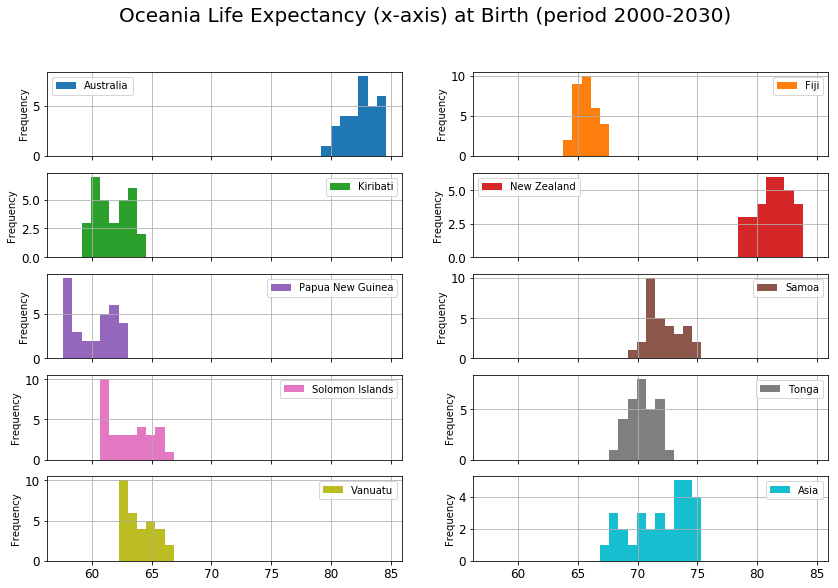

In [3]:
# Select period 2000 - 2030 for examination
lexR = lexOcean.loc[:, list(range(2000,2031))]
lexT = lexR.transpose()
plt.rcParams["figure.figsize"] = [14,9]
#lexT.plot(sharex=True,kind="hist",alpha=0.4,bins=80) (Too difficult to differentiate countries)
#lexT.plot(sharex=True,kind="hist",bins=50,stacked=True) (Stacked chart not used as too confusing)
lexT.plot(sharex=True,kind="hist",bins=35,subplots=True,layout=(5,2),grid=True,fontsize=12)
plt.suptitle("Oceania Life Expectancy (x-axis) at Birth (period 2000-2030)",size=20)
plt.rcParams.update({'font.size': 12})
plt.show()

### Life Expectancy in Oceania - increasing upwards line graph

The lexOcean dataframe is transposed in the python code below so that a year time index in the dataframe can be used for time series graphical analysis.  The line graph is created using Matplotlib.

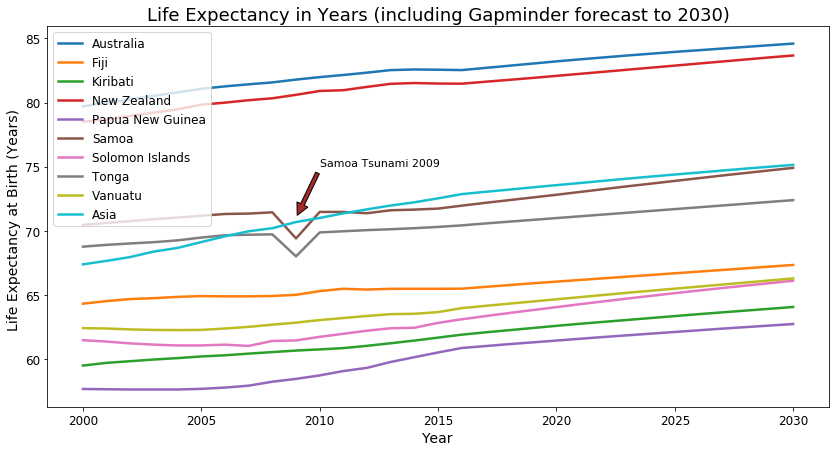

In [34]:

plt.rcParams["figure.figsize"] = [14,7]
ax = lexT.plot(linewidth=2.5)
plt.title("Life Expectancy in Years (including Gapminder forecast to 2030)",size=18)
plt.legend(frameon=True,loc='best', prop={'size':12})
plt.xlabel("Year",size=14)
plt.ylabel("Life Expectancy at Birth (Years) ",size=14)
ax.annotate('Samoa Tsunami 2009', xy=(2009, 71), xytext=(2010, 75), size = 11,
            arrowprops=dict(facecolor='brown', shrink=0.05),
            )
#plt.savefig('LifeExpOceania.png')
plt.show()

### Samoa Tsunami 2009 impact
Note the glitch in the graph below Samoa and Tonga in 2009 is expected to be due to the Samoa Earthquake and Tsunami that caused 189 deaths.
https://en.wikipedia.org/wiki/2009_Samoa_earthquake_and_tsunami.  Although some deaths were reported in Tonga from what I can determine the number was much lower than Samoa - I have not been able to validate the Tonga numbers using brief internet searches.

### Under 5 Mortality Rate in Oceania

Lets examine the mortality rate for those under 5 for the Oceania countries in the study.  Under 5 mortality is a component of Life Expectancy and higher rates in this category do have a high proportional impact on Life Expectancy.  The histogram below shows the Under 5 mortality rate in each country in "Oceania's nine".

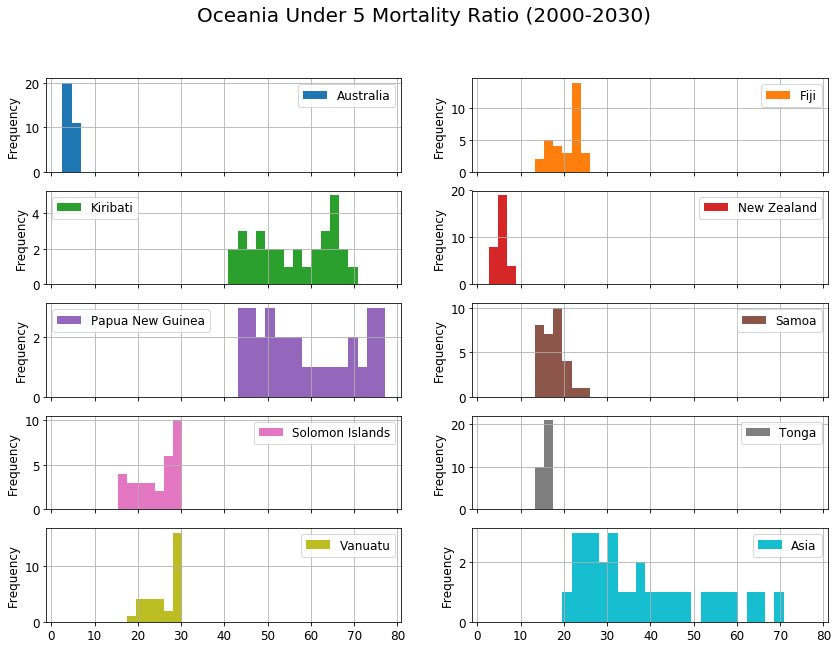

In [35]:
u5mr = pd.ExcelFile('u5mr-by-gapminder.xlsx')
u5mrR = u5mr.parse('countries_and_territories',index_col="geo.name")
u5mrOceania = u5mrR.loc[['Australia', 'Fiji', 'Kiribati', 'New Zealand', 'Papua New Guinea','Samoa', 'Solomon Islands','Tonga',\
                         'Vanuatu',]] #select Oceania country rows
u5mr2 = u5mr.parse('four_regions', index_col = "geo.name")
u5mrAsia = u5mr2.loc[['Asia']] #Select Asia Average u5mr
u5mrAsia.columns = u5mrOceania.columns #change columns to floats to solve inconsistent type use in raw data (strings 2013+) 
u5mrOcean = pd.concat([u5mrOceania,u5mrAsia])
u5mrO = u5mrOcean.loc[:,list(range(2000,2031))]
u5mrT = u5mrO.transpose()
plt.rcParams["figure.figsize"] = [14,10]
uHist = u5mrT.plot(sharex=True,kind="hist",bins=35,subplots=True,layout=(5,2),grid=True,fontsize=12)
plt.suptitle("Oceania Under 5 Mortality Ratio (2000-2030)",size=20)
plt.rcParams.update({'font.size': 12})
plt.show()

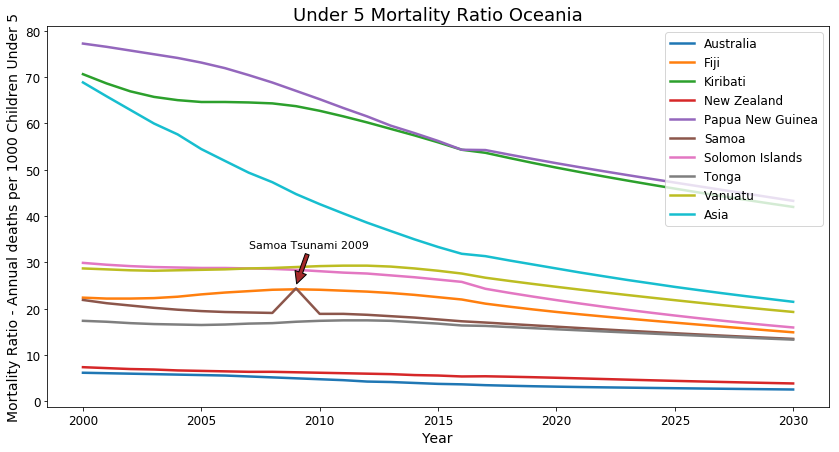

In [36]:
plt.rcParams["figure.figsize"] = [14,7]
ax2 = u5mrT.plot(linewidth=2.5)
plt.title("Under 5 Mortality Ratio Oceania",size=18)
plt.legend(frameon=True,loc='best', prop={'size':12})
plt.xlabel("Year", size=14)
plt.ylabel("Mortality Ratio - Annual deaths per 1000 Children Under 5",size=14)
ax2.annotate('Samoa Tsunami 2009', xy=(2009, 25), xytext=(2007, 33), size = 11,
            arrowprops=dict(facecolor='brown', shrink=0.05),
           )
#plt.savefig('U5MortOceania.png')
plt.show()

Please note that it was reported that a large number of deaths in the Samoa Tsunami were children. This seems to be indicated in the data https://en.wikipedia.org/wiki/2009_Samoa_earthquake_and_tsunami

### Infant Mortality in Oceania
Infant Mortality is the probability that a child born in a specific year will die before reaching the age of one, if subject to current age-specific mortality rates. Expressed as a rate per 1,000 live births. The histogram below shows the distribution of under 1 mortality ratio for each country.

There is no Gapminder forecast Infant Mortality beyond 2015 unlike the other datasets, and no summary for Asia region is explicitly available in this dataset.

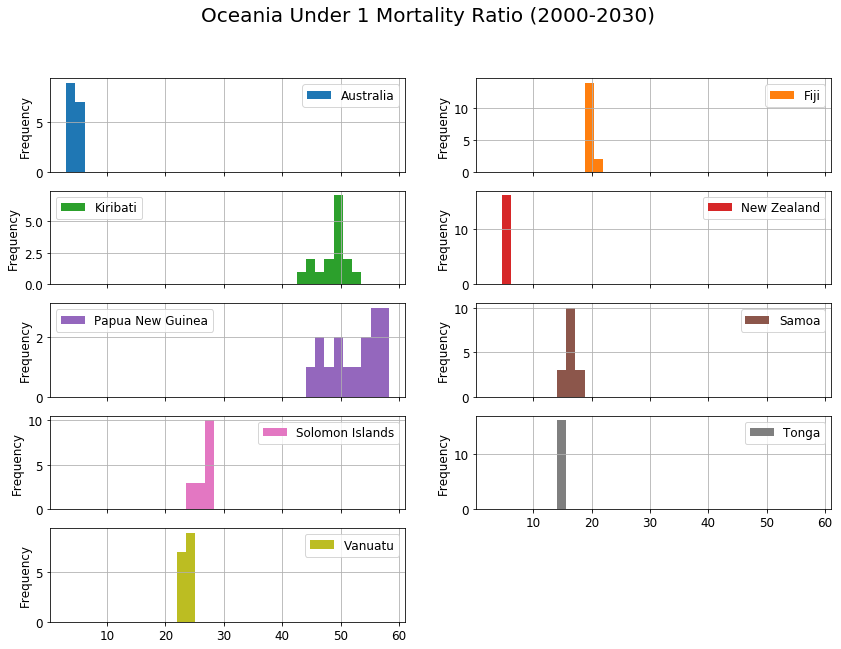

In [37]:
infm = pd.ExcelFile('indicator gapminder infant_mortality.xlsx')
infm1 = infm.parse('Data',index_col="Infant mortality rate")
infmOceania = infm1.loc[['Australia', 'Fiji', 'Kiribati', 'New Zealand', 'Papua New Guinea','Samoa', 'Solomon Islands','Tonga',\
                         'Vanuatu',]] #select Oceania country rows
infmO = infmOceania.loc[:,list(range(2000,2016))]
infmT = infmO.transpose()
plt.rcParams["figure.figsize"] = [14,10]
bar_infm = infmT.plot(sharex=True,kind="hist",bins=35,subplots=True,layout=(5,2),grid=True)
plt.suptitle("Oceania Under 1 Mortality Ratio (2000-2030)",size=20)
plt.rcParams.update({'font.size': 12})
plt.show()

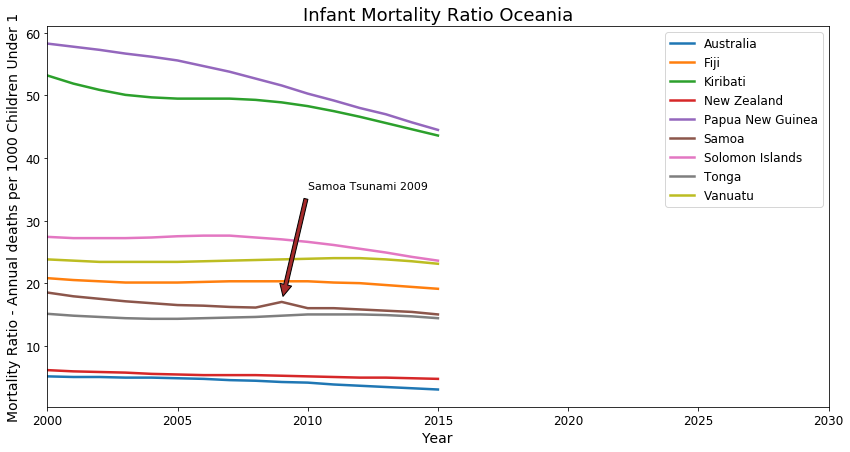

In [38]:
plt.rcParams["figure.figsize"] = [14,7]
inf_ax = infmT.plot(linewidth=2.5)
plt.title("Infant Mortality Ratio Oceania",size=18)
plt.legend(frameon=True,loc='best', prop={'size':12})
plt.xlabel("Year", size=14)
plt.xlim([2000,2030])
plt.ylabel("Mortality Ratio - Annual deaths per 1000 Children Under 1",size=14)
#plt.savefig('U1MortOceania.png')  #saves the graphics file
inf_ax.annotate('Samoa Tsunami 2009', xy=(2009, 17), xytext=(2010, 35), size = 11,
            arrowprops=dict(facecolor='brown', shrink=0.05),
           )
plt.show()

It appears that infant mortality comprises the majority of Under 5 Mortality and some countries have very high rates.  The ratio of U1/U5 mortality is examined further later in this report. In Papua New Guinea for example studies have show that significant regional, rural and urban differences exist https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3360603/

### Gross Domestic Product per Capita in Oceania - data frame preparation
This section prepares the GDP per capita, PPP (constant 2011 international $) data for 9 countries in Oceania.

In [9]:
gdp = pd.ExcelFile('gdppc_cppp-by-gapminder.xlsx') #import gdp data
gdp1 = gdp.parse('countries_and_territories',index_col = "geo.name") #use country name as primary index
gdpOceania = gdp1.loc[['Australia', 'Fiji', 'Kiribati', 'New Zealand', 'Papua New Guinea','Samoa', 'Solomon Islands','Tonga',\
                       'Vanuatu', ]] #select Oceania country rows (note New Caledonia GDP data missing so is not included)
gdp2 = gdp.parse('four_regions', index_col = "geo.name")
gdpAsia = gdp2.loc[['Asia']] #Select Asia Average gdp
gdpAsia.columns = gdpOceania.columns #change columns to floats to solve inconsistent type use in raw data (strings 2013+) 
gdpOcean = pd.concat([gdpOceania,gdpAsia])
gdpO = gdpOcean.loc[:,list(range(2000,2031))] #select time period for analysis
gdpT = gdpO.transpose() #transpose dataframe to support line plot
gdpT.tail()

geo.name,Australia,Fiji,Kiribati,New Zealand,Papua New Guinea,Samoa,Solomon Islands,Tonga,Vanuatu,Asia
2026,52496.0,11758.0,1986.0,41570.0,3083.0,6643.0,2320.0,6181.0,3193.0,16726.0
2027,53611.0,12032.0,2024.0,42450.0,3145.0,6779.0,2367.0,6310.0,3258.0,17114.0
2028,54773.0,12306.0,2066.0,43369.0,3211.0,6923.0,2417.0,6446.0,3327.0,17487.0
2029,55974.0,12582.0,2110.0,44320.0,3281.0,7074.0,2469.0,6587.0,3399.0,17854.0
2030,57209.0,12862.0,2156.0,45298.0,3353.0,7230.0,2523.0,6732.0,3474.0,18220.0


### Gross Domestic Product per Capita in Oceania - country chart
This section graphs the GDP per capita, PPP (constant 2011 international $) for 9 countries in Oceania.

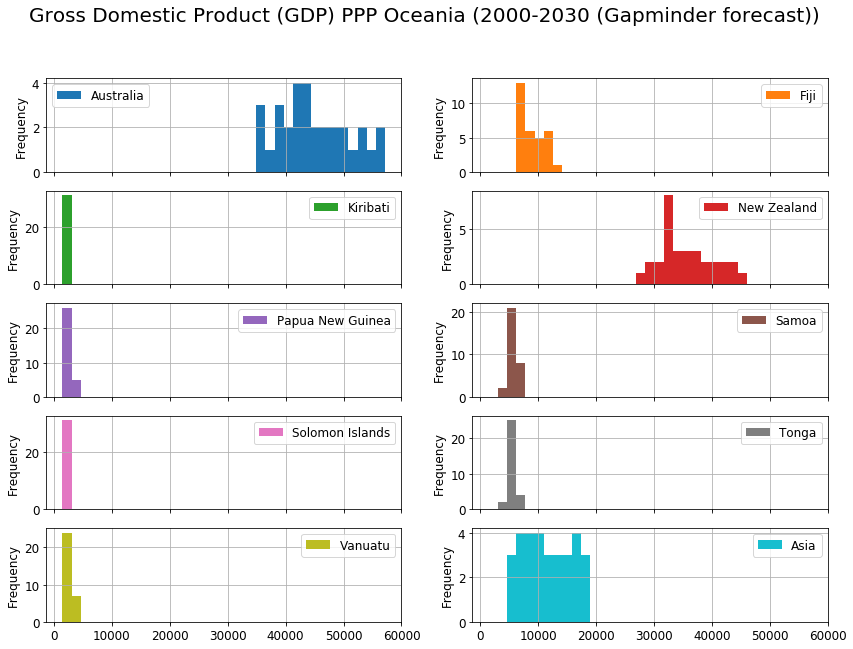

In [10]:
plt.rcParams["figure.figsize"] = [14,10]
gdpT.plot(sharex=True,kind="hist",bins=35,subplots=True,layout=(5,2),grid=True)
plt.suptitle("Gross Domestic Product (GDP) PPP Oceania (2000-2030 (Gapminder forecast))",size=20)
plt.rcParams.update({'font.size': 12})
plt.show()

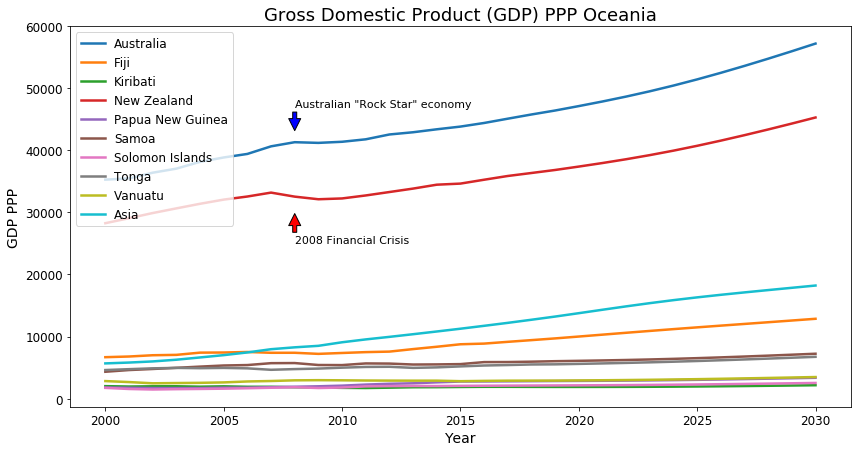

In [39]:
plt.rcParams["figure.figsize"] = [14,7]
gdp_ax = gdpT.plot(linewidth=2.5)
plt.title("Gross Domestic Product (GDP) PPP Oceania",size=18)
plt.legend(frameon=True,loc='upper left', prop={'size':12})
plt.xlabel("Year",size=14)
plt.ylabel("GDP PPP",size=14)
gdp_ax.annotate('2008 Financial Crisis', xy=(2008, 30000), xytext=(2008, 25000), size = 11,
            arrowprops=dict(facecolor='red', shrink=0.05),
           )
gdp_ax.annotate('Australian "Rock Star" economy', xy=(2008, 43000), xytext=(2008, 47000), size = 11,
            arrowprops=dict(facecolor='blue', shrink=0.05),
           )
plt.savefig('GDPOceania.png') # saves the graphics file
plt.show()

Both Australia and New Zealand were not as adversly impacted by the 2007/2008 Financial Crisis as most other OECD countries.

## Data Preparation and Cleaning
In the sections that follow the data is reformated into long format and then combined to enable the exploratory data analysis fo more than one variable.

*Note that 4 countries were removed from the dataset as explained in the introduction, these countries could be added a later analysis.  To add Nauru, Palau, Tuvalu and New Caledonia is a task that involves imputation of time series and due to the time period of analysis forecasting to 2030.*

### Create long format dataframe for Life Expectancy variable

In [12]:
#this melts the dataframe into long form for later combination
lexOceania['geo.name'] = lexOceania.index     #add geo.name column back in
lexO = lexOceania.loc[:, ['geo.name'] + list(range(2000,2031))]
year_range = list(range(2000,2031))
lifeM = pd.melt(lexO,id_vars='geo.name',value_vars = year_range,var_name='Year',value_name='LifeExp')
lifeM.tail()

,geo.name,Year,LifeExp
274,Papua New Guinea,2030,62.71
275,Samoa,2030,74.90
276,Solomon Islands,2030,66.09
277,Tonga,2030,72.38
278,Vanuatu,2030,66.27


### Create long format dataframe for under 5 mortality variable

In [13]:
###Melt Under 5 Mortality Rate into long form for later combination
u5mrOceania['geo.name'] = u5mrOceania.index     #add geo.name column back in
u5mr3 = u5mrOceania.loc[:, ['geo.name'] + list(range(2000,2031))]
year_range = list(range(2000,2031))
u5mrM = pd.melt(u5mr3, id_vars='geo.name',value_vars = year_range,var_name='Year',value_name='Mortality_U5')
u5mrM.head()
u5mrM.tail()

,geo.name,Year,Mortality_U5
274,Papua New Guinea,2030,43.275
275,Samoa,2030,13.506
276,Solomon Islands,2030,15.965
277,Tonga,2030,13.343
278,Vanuatu,2030,19.313


### Create long format dataframe for GDP PPP variable

In [14]:
###MELTs GDP variable into long form
gdpOceania['geo.name'] = gdpOceania.index     #add geo.name column back in
gdp3 = gdpOceania.loc[:, ['geo.name'] + list(range(2000,2031))]
year_range = list(range(2000,2031))
gdpM = pd.melt(gdp3, id_vars='geo.name',value_vars = year_range,var_name='Year',value_name='GDP_PPP')
gdpM.tail()

,geo.name,Year,GDP_PPP
274,Papua New Guinea,2030,3353.0
275,Samoa,2030,7230.0
276,Solomon Islands,2030,2523.0
277,Tonga,2030,6732.0
278,Vanuatu,2030,3474.0


### Merge variables together into a tidy format dataframe for multi-variate data exploration
This section creates a dataset that merges Life Expectancy, Under 5 Mortality and GDP variables into a tidy datafame which can be used in the exploratary analysis section of the report.

In [15]:
# create a merge data frame with the following columns:
# country, year, lifeExp, GDP,u5mr for 13 Oceania countries
# use this in animation code from R for u5mr
life_gdp = pd.merge(left = lifeM,right=gdpM,on = ['geo.name','Year'])
life_gdp.tail()
combined = pd.merge(left = life_gdp, right = u5mrM, on = ['geo.name','Year'])
combined.tail()
combined.to_csv('combined.csv') #The combined.csv used as input to R code to create gif oceania_u5.gif see later in this report
combined.tail(13)

,geo.name,Year,LifeExp,GDP_PPP,Mortality_U5
266,Samoa,2029,74.70,7074.0,13.734
267,Solomon Islands,2029,65.90,2469.0,16.425
268,Tonga,2029,72.24,6587.0,13.552
269,Vanuatu,2029,66.11,3399.0,19.786
270,Australia,2030,84.60,57209.0,2.586
271,Fiji,2030,67.32,12862.0,14.922
272,Kiribati,2030,64.04,2156.0,41.965
273,New Zealand,2030,83.67,45298.0,3.890
274,Papua New Guinea,2030,62.71,3353.0,43.275
275,Samoa,2030,74.90,7230.0,13.506


<a id='eda'></a>
## Exploratory Data Analysis

#### In this section the data and its relationships are examined to answer the following questions:

1. Do Oceania countries with lower life expectancies typically have higher child mortality ratios?

2. What is the ratio of under 1 to under 5 infant mortality for Oceania countries and is there much variation between countries?

3. Do Oceania countries with lower income (i.e. lower GDP) have different characteristics from those with higher income?

4. How do Oceania U5 mortality improvements from 2000 - 2015 compare against better improving countries in the world as well as the Asian average? 


### Qu.1: Do Oceania countries with lower life expectancies typically have higher child mortality ratios?
The section below creates a Oceania Life expectancy vs. under 5 mortality scatter plot using Python's Seaborn package.

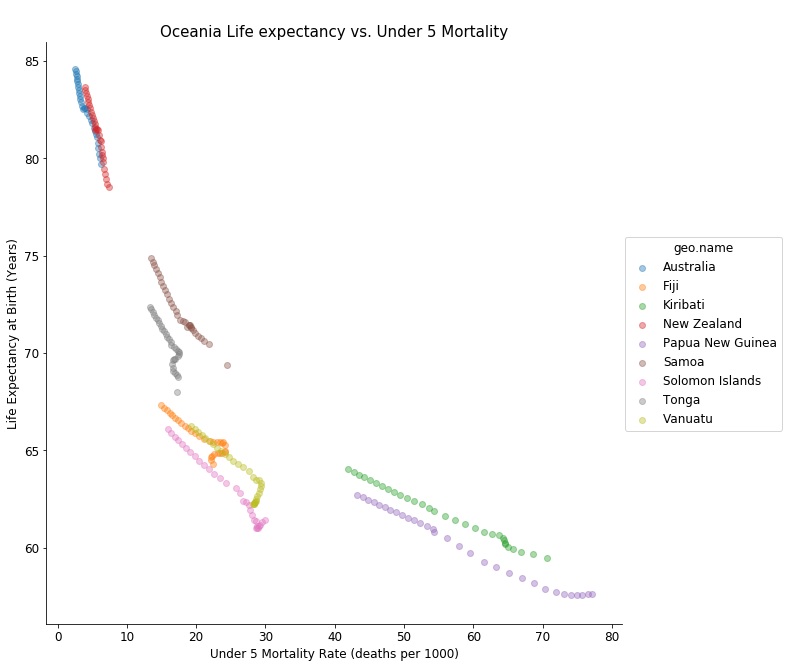

In [16]:
#hue to scatter plot
sns.lmplot(data=combined, y='LifeExp',x='Mortality_U5', size=9, hue = 'geo.name',fit_reg=False, legend = True,\
           scatter_kws={'alpha':0.4}) 
#hue_order=['LowGDP','MedGDP','HighGDP']
plt.title('\nOceania Life expectancy vs. Under 5 Mortality',fontsize=15)
plt.xlabel('Under 5 Mortality Rate (deaths per 1000)',fontsize=12)
plt.ylabel('Life Expectancy at Birth (Years)',fontsize=12)
plt.savefig('LifeExp_U5.png')
plt.show()

Lets examine the correlation between Life Expectancy and U5 Mortality in Oceania's nine from 2000 - 2030.

In [17]:
#calculate the correlation across the whole dataset
data = combined[['Mortality_U5','LifeExp']]
correlation_MortU5_LifeExp = data.corr(method='pearson')
correlation_MortU5_LifeExp

,Mortality_U5,LifeExp
Mortality_U5,1.000000,-0.819613
LifeExp,-0.819613,1.000000


The negative 8.2 correlation coefficient is reasonably strong so there is a strong negative association.  That is if under 5 mortality rates are low then associated life expectancy is higher.  So it appears that countries with lower life expectancies have higher associated child mortality ratios. Note that the relationship in Oceania visually appears to be non-linear.

### Qu. 2:  What is the ratio of under 1 to under 5 infant mortality for Oceania countries?
There are two datasets relating to child mortality.  The infant (U1) mortality is a subset of the under 5 data, due to the dependence of the variables some relationship between this data is expected.

In [18]:
###Melt Under 5 Mortality Rate into long form for later combination
infmOceania['geo.name'] = infmOceania.index     #add geo.name column back in
infm3 = infmOceania.loc[:, ['geo.name'] + list(range(2000,2016))]
year_range_s = list(range(2000,2016))
infmM = pd.melt(infm3, id_vars='geo.name',value_vars = year_range_s,var_name='Year',value_name='Mortality_U1')

In [19]:
# Filter for years 2000-2015 for Mortality_U5 data to match Mortality_U1 data available time period
u5mrM_0_15 = u5mrM.iloc[0:144]
# Now merge dataframes to create a combined dataset that has both under 5 and under 1 mortality ratios
u1_u5 = pd.merge(left = infmM,right=u5mrM_0_15,on = ['geo.name','Year'])
u1_u5.tail()

,geo.name,Year,Mortality_U1,Mortality_U5
139,Papua New Guinea,2015,44.5,56.2
140,Samoa,2015,15.0,17.7
141,Solomon Islands,2015,23.6,26.3
142,Tonga,2015,14.4,16.8
143,Vanuatu,2015,23.1,28.2


In [20]:
#This cell calculated the ratio of under 1 to under 5 mortality 2000-2015
u1_u5['Percent_U1_U5'] = u1_u5['Mortality_U1'] / u1_u5['Mortality_U5']
u1_u5.head()
meanu1_u5 = u1_u5.Percent_U1_U5.mean() #This calculates the mean
u1_u5.Percent_U1_U5.describe()

count    144.000000
mean       0.835058
std        0.052010
min        0.696721
25%        0.813919
50%        0.835271
75%        0.857143
max        0.961672
Name: Percent_U1_U5, dtype: float64

### 83.5% of all under 5 deaths in 9 Oceania countries in this study occur in the first year of life.
This is the mean of the nine countries and is not a population weighted calculation. (NOTE a population weighted calculation should also be performed). 

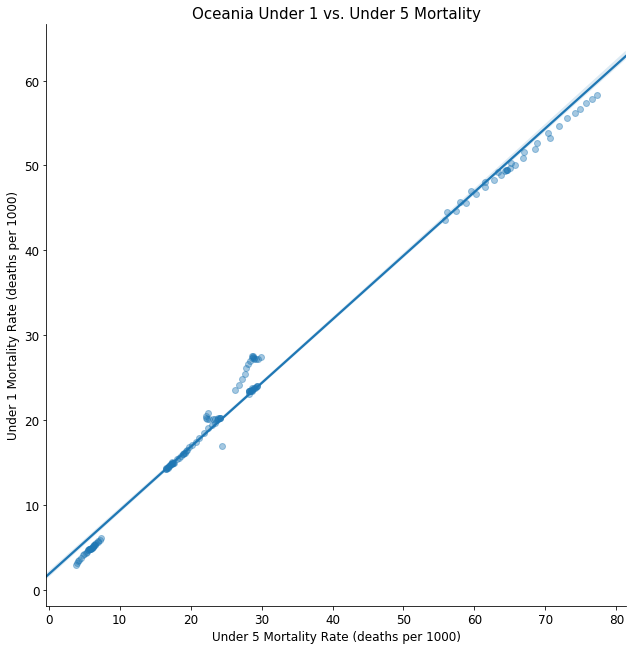

In [21]:
sns.lmplot(data=u1_u5, y='Mortality_U1',x='Mortality_U5', size=9, fit_reg=True, legend = True,scatter_kws={'alpha':0.4}) 
plt.title('Oceania Under 1 vs. Under 5 Mortality',fontsize=15)
plt.xlabel('Under 5 Mortality Rate (deaths per 1000)',fontsize=12)
plt.ylabel('Under 1 Mortality Rate (deaths per 1000)',fontsize=12)
plt.show()

This very high correlation means that all countries in Oceania regardless of GDP or Life Expectancy changes over time have a large proportion of under 5 mortality due to infant (U1) deaths. 

In [22]:
#calculate the correlation across the whole dataset
data = u1_u5[['Mortality_U5','Mortality_U1']]
correlation_MortU5_MortU1 = data.corr(method='pearson')
correlation_MortU5_MortU1

,Mortality_U5,Mortality_U1
Mortality_U5,1.00000,0.99587
Mortality_U1,0.99587,1.00000


In [23]:
#change data to have only ratio values with countries as columns and year as the index
pre_T = u1_u5[['geo.name','Year','Percent_U1_U5']]

#we want 'geo.name' as columns and 'year' as index so we can do line plots
percent_wide = pre_T.pivot(index='Year', columns='geo.name',values='Percent_U1_U5')

Lets investigate how much varation there is in U1 to U5 mortality ratio there is on a country by country basis and visualise it in a boxplot.

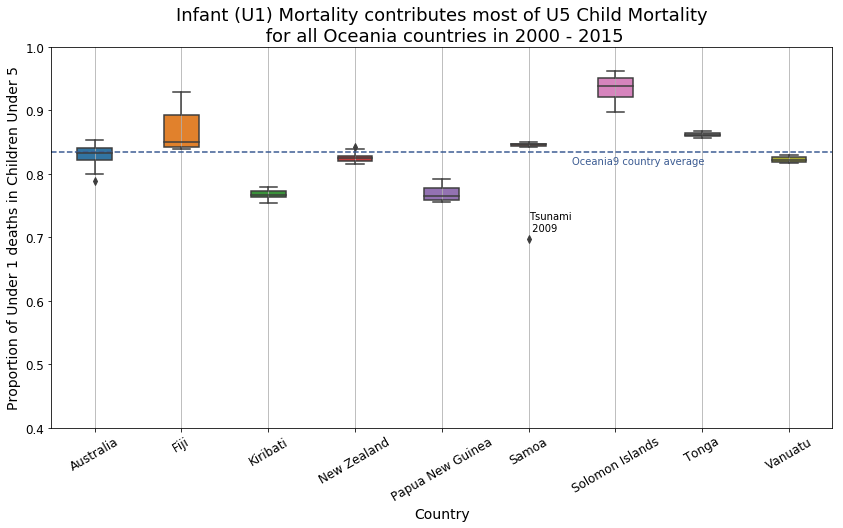

In [24]:
plt.rcParams["figure.figsize"] = [14,7]
#PER = percent_wide.plot.box()
sns.boxplot(data = percent_wide,width=0.4)
plt.title("Infant (U1) Mortality contributes most of U5 Child Mortality\n for all Oceania countries in 2000 - 2015",size=18)
#plt.legend(frameon=True,loc='best', prop={'size':12})
plt.xlabel("Country", size=14)
plt.xticks(fontsize=12,rotation=30)
plt.yticks(fontsize=12)
plt.grid(True, axis = 'x')
plt.ylabel("Proportion of Under 1 deaths in Children Under 5",size=14)
plt.ylim([0.4,1])
x = plt.gca().axes.get_xlim() #to draw population mean line across the plot
plt.plot(x, len(x) * [meanu1_u5], sns.xkcd_rgb["denim blue"],linestyle='--') #to draw the population mean line across the plot
plt.gca().annotate('Oceania9 country average', xy=(5.5, 0.81), xytext=(5.5, 0.815), size = 10, color = sns.xkcd_rgb["denim blue"])
plt.gca().annotate('Tsunami\n 2009', xy=(5, 0.70), xytext=(5, 0.71), size = 10)
plt.show()

As can be seen in the plot above all nations have a high proportion (i.e greater than 75%) of all under 5 deaths occuring in the under 1 infant category.  Solomon Islands has the highest proportion of infant mortality of all of the countries in the "Oceania's nine" dataset.  While it is true that Kiribati and Papua New Guinea have the lowest proportion of U1 deaths note that this is still high as an overall proportion of under 5 deaths.

### Qu.3: Do Oceania countries with lower incomes (i.e. low GDP) have different characteristics from those with higher incomes?
Note that the category definitions of low, medium and high GDP used in the study below have been segmented based on an arbitrary categorisation that has been created for Oceania as explained below.

1. LowGDP ( x < 4350 GDP_PPP)
2. MedGDP ( x < 21000 and x >= 4350 GDP_PPP )
3. HighGDP ( x >= 21000 GDP_PPP )

Note: the income definitions according to the world bank are different with Fiji classified as an Upper-Middle-Income economy with countries Kiritbati, Papua New Guinea, Samoa, Solomon Islands, Tonga, Vanuatu classified as Lower-Middle-Income economies. 

In [25]:
#create a categoric of GDP values to group countries by GDP range categories for graphing and further analysis
filter_method = lambda x: 'HighGDP' if x >= 21000  else 'MedGDP' if (x < 21000 and x >= 4350) else 'LowGDP' if x < 4350 else None
combined['GDP_level'] = combined['GDP_PPP'].apply(filter_method)
# Note there is one data point where Samoa is categorised as LowGDP from the equation above.  This point is changed to MedGDP
# for consistency.  N.B. Samoa has successfully transition from low-income status to higher income status (add link).
combined.iloc[5,5] = 'MedGDP' #Samoa 2000 GDP changed to MedGDP so country is not classified as lowGDP
combined.head(9)

,geo.name,Year,LifeExp,GDP_PPP,Mortality_U5,GDP_level
0,Australia,2000,79.70,35281.0,6.2,HighGDP
1,Fiji,2000,64.30,6674.0,22.4,MedGDP
2,Kiribati,2000,59.47,2007.0,70.6,LowGDP
3,New Zealand,2000,78.51,28265.0,7.4,HighGDP
4,Papua New Guinea,2000,57.64,1791.0,77.2,LowGDP
5,Samoa,2000,70.45,4326.0,21.9,MedGDP
6,Solomon Islands,2000,61.45,1729.0,29.9,LowGDP
7,Tonga,2000,68.75,4602.0,17.4,MedGDP
8,Vanuatu,2000,62.39,2823.0,28.7,LowGDP


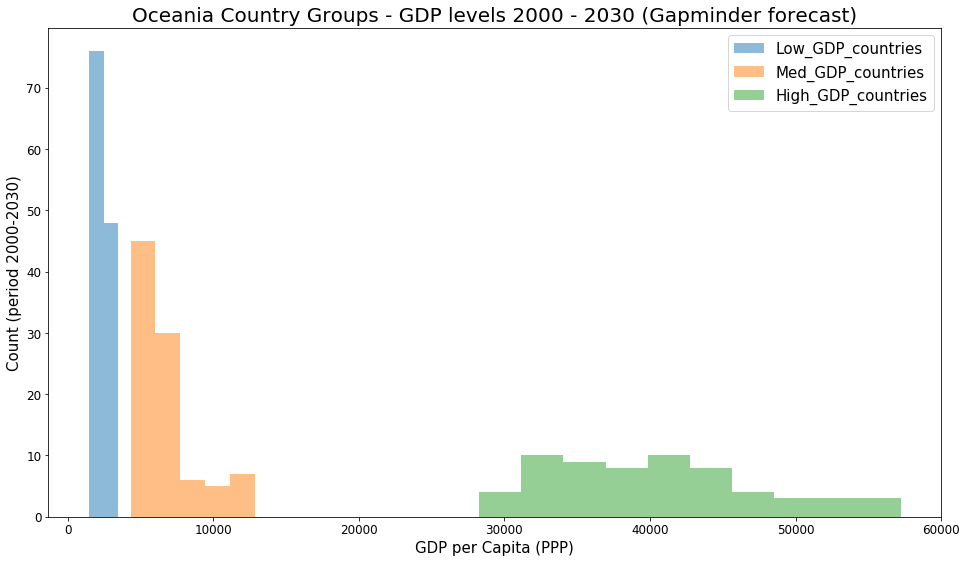

In [26]:
#Create Dataframes for high, medium and low GDP
Low = combined.loc[combined['GDP_level']=='LowGDP',:] #low = Vanuatu, Solomon Is., Kiribati, Papua New Guinea 
Med = combined.loc[combined['GDP_level']=='MedGDP',:] #Med = Fiji, Tonga, Samoa
High = combined.loc[combined['GDP_level']=='HighGDP',:] #High = Australia, New Zealand

plt.rcParams["figure.figsize"] = [16,9]
#Plot histogram of the countries side by side (note New Caledonia GDP is missing from Gapminder)
plt.hist(Low.GDP_PPP,alpha=0.5,label = 'Low_GDP_countries',bins=2)
plt.hist(Med.GDP_PPP,alpha=0.5,label = 'Med_GDP_countries',bins=5)
plt.hist(High.GDP_PPP,alpha=0.5,label = 'High_GDP_countries')
plt.legend(loc='upper right',fontsize=15)
plt.title("Oceania Country Groups - GDP levels 2000 - 2030 (Gapminder forecast)",size=20)
plt.xlabel('GDP per Capita (PPP)',size =15)
plt.ylabel('Count (period 2000-2030)',size =15)
plt.show()

The chart above indicates there is some segmentation particularly between high income donor countries and the seven other countries.

### Life Expectancy versus GDP in Oceania
In general time progresses from left (year 2000) to right (year 2030) in the scatter plot below.  Note that the x-axis is  converted to a log scale due to the non-linear GDP relationship to create a more linear relationship. 

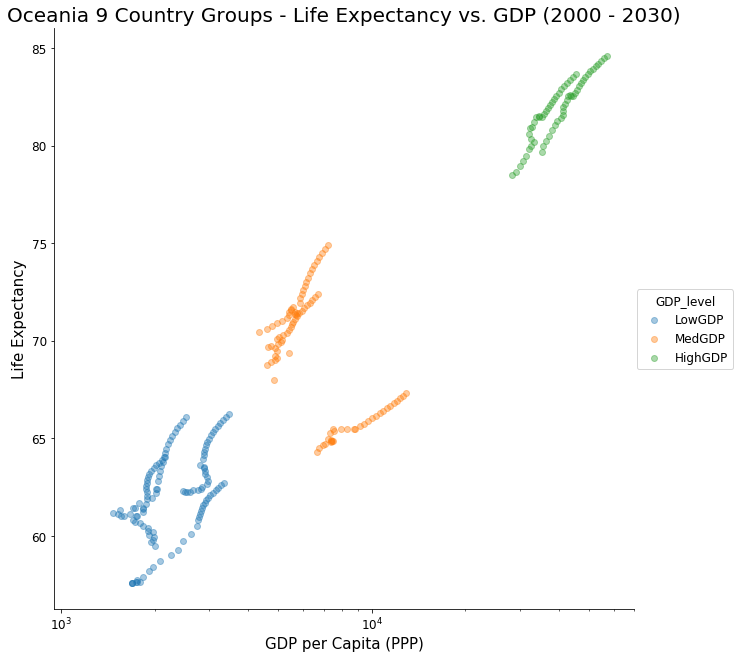

In [27]:
# Add plot of Life Expectancy vs. GDP in Oceania and a plot of 

lex_gdp = sns.lmplot(data=combined, y='LifeExp',x='GDP_PPP', fit_reg=False, scatter_kws={'alpha':0.4},\
                     size=9, hue = 'GDP_level', hue_order=['LowGDP','MedGDP','HighGDP'])

lex_gdp.set(xscale="log")
plt.title("Oceania 9 Country Groups - Life Expectancy vs. GDP (2000 - 2030)",size=20)
plt.xlabel('GDP per Capita (PPP)',size =15)
plt.ylabel('Life Expectancy',size =15)
plt.show()

Life expectancy is in general increasing across countries of all incomes.  In the animated gif generated in R below a log scale has been used.  The input data for this animation comes from the input file 'combined.csv' which was generated previously in this study.  The time animation below provides a way to better visualise the time dimension which cannot be easily seen in the static chart above.

![source: https://github.com/PhilNelsonNZ/ODA_Oceania_NZ](oceania_u5.gif)


### Under-five Mortality Ratio versus GDP in Oceania
In general time progresses from left (year 2000) to right (year 2013) in the chart below.  Note that the x-axis has not been  converted to a log scale due but the # can be removed in the code below to view the GDP relationship with a log x-axis.

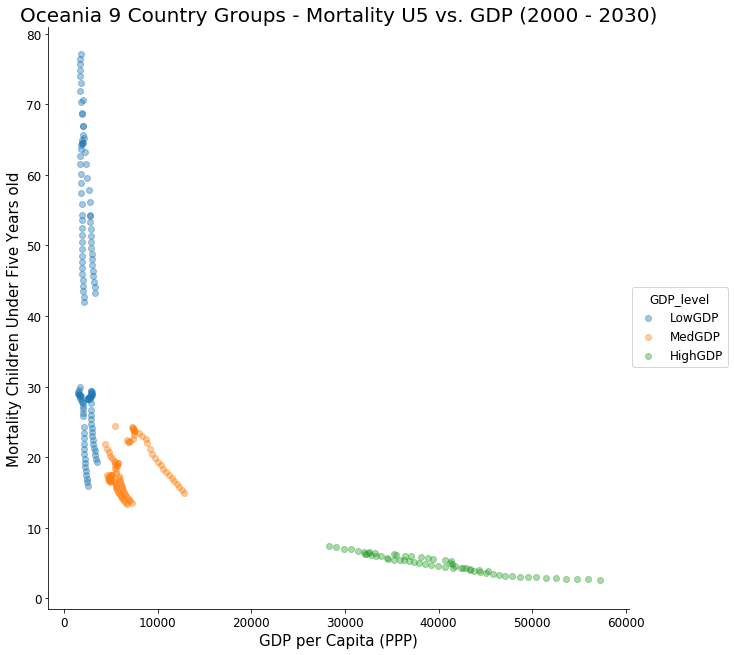

In [28]:
u5mr_gdp = sns.lmplot(data=combined, y='Mortality_U5',x='GDP_PPP', fit_reg=False, scatter_kws={'alpha':0.4},\
                     size=9, hue = 'GDP_level',hue_order=['LowGDP','MedGDP','HighGDP'])
#u5mr_gdp.set(xscale="log")
plt.title("Oceania 9 Country Groups - Mortality U5 vs. GDP (2000 - 2030)",size=20)
plt.xlabel('GDP per Capita (PPP)',size =15)
plt.ylabel('Mortality Children Under Five Years old',size =15)
plt.show()

U5 Mortality rate changes over time are typically higher for low GDP countries than for high GDP countries where smaller incremental improvements occur. 

### Qu.4: How do Oceania U5 mortality improvements from 2000 - 2015 compare against the best improving countries in the world and the Asian average?
According to Gapminder some countries did meet the Millenium Development Goals 

In [29]:
# In this section a new column is created which looks at the u5mr difference between 2015 and 2000 for all countries
# The list has been then sifted through to look at those areas of improvement and which countries to contrast wih Oceania
u5mrR.head()
u5mrCOMP = u5mrR.loc[:,list(range(2000,2031))]
world_u5mr = u5mrCOMP.dropna()

### Selected country comparison on under 5 mortality ratios
In the plot below "selected" countries outside of Oceania and the Asian average are compared with the Oceania 9 countries.  The selected countries have been arbitrarily chosen based on the following criteria:

1. Similiar range of Under 5 mortality range to Oceania countries (typically 110 or less at year 2000)
2. Select countries that have achieved good reductions in Under 5 mortality
3. Also includes "Asia" average noting that Oceania's nine countries are a subset of the Asia average

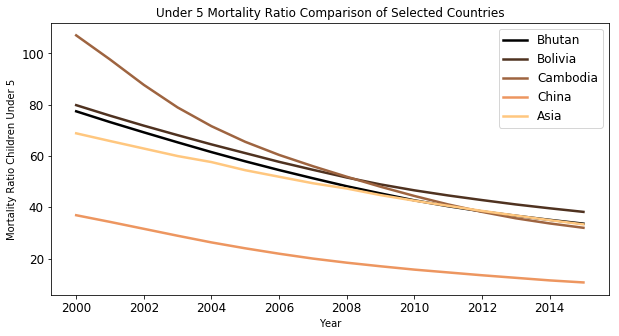

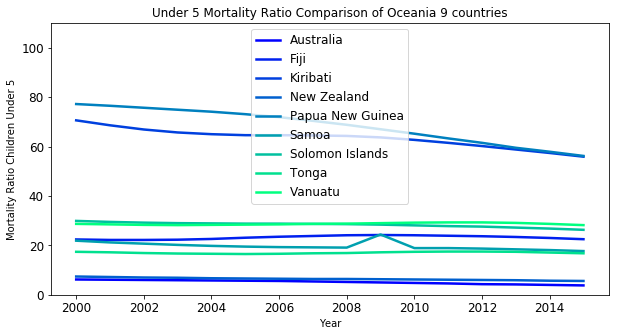

In [33]:
plt.rcParams["figure.figsize"] = [10,5]
#select countries to compare
u5mrSelect = u5mrR.loc[['Bhutan','Bolivia',"Cambodia",'China',]]
#Now add the Asia Average value to the dataset
u5mrCompare = pd.concat([u5mrSelect,u5mrAsia]) # concatenate the 4 selected countries with the Asian average
u5mrC = u5mrCompare.loc[:,list(range(2000,2016))]
u5mrTc = u5mrC.transpose()

Selected_2000_2015 = u5mrTc.max() - u5mrTc.min()

#plt.subplot(2,2,1)
#plt.rcParams["figure.figsize"] = [10,5]
u5mrTc.plot(linewidth=2.5,colormap="copper")
plt.title("Under 5 Mortality Ratio Comparison of Selected Countries",size=12)
plt.legend(frameon=True,loc='best', prop={'size':12})
plt.xlabel("Year", size=10)
plt.ylabel("Mortality Ratio Children Under 5",size=10)
#plt.savefig('U5MortSelected.png')

#select Oceania without Asia
u5mrOia = u5mrOceania.loc[:,list(range(2000,2016))]
u5mrTia = u5mrOia.transpose()

#print Oceania plot
u5mrTia.plot(linewidth=2.5,colormap="winter")
plt.title("Under 5 Mortality Ratio Comparison of Oceania 9 countries",size=12)
plt.legend(frameon=True,loc='best', prop={'size':12})
plt.xlabel("Year", size=10)
plt.ylim([0,110])
plt.ylabel("Mortality Ratio Children Under 5",size=10)
plt.show()

In the plots above we can see that in the "selected" countries the reduction in under 5 mortality is significantly higher than in Oceania's nine countries.

### Reductions in Under 5 Mortality from 2000 - 2015 in Oceania vs. Selected areas

Lets now look at the change in mortality rate between 2000 and 2015 under 5 mortality ratios in the selected countries and Asia and Oceania's nine.

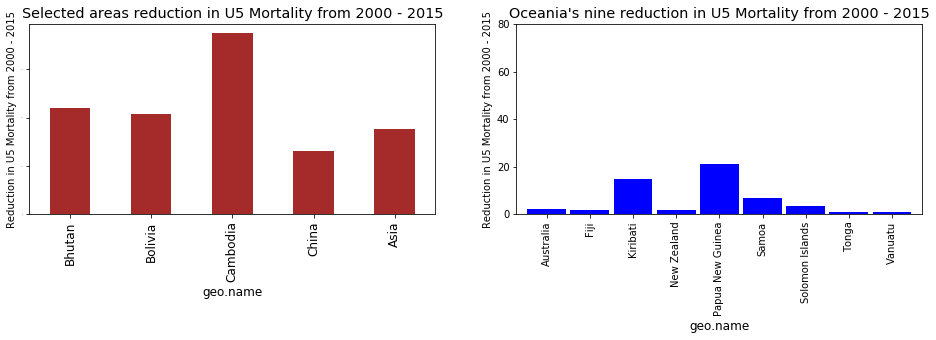

In [31]:
Selected_2000_2015 = u5mrTc.max() - u5mrTc.min()  #calculates the difference between the max and min figures
plt.rcParams["figure.figsize"] = [16,3.5]
plt.subplot(1,2,1)
selected_bar = Selected_2000_2015.plot(kind="bar", color="brown",width=0.5)
plt.title("Selected areas reduction in U5 Mortality from 2000 - 2015")
plt.xticks(fontsize=12)
plt.yticks(fontsize=1)
plt.ylabel("Reduction in U5 Mortality from 2000 - 2015",size=10)

Oceania9_2000_2015 = u5mrTia.max() - u5mrTia.min() #calculates the difference between the highest and lowest

plt.subplot(1,2,2)
Ocean9_bae = Oceania9_2000_2015.plot(kind="bar", colormap="winter",width=0.9)
plt.title("Oceania's nine reduction in U5 Mortality from 2000 - 2015")
plt.ylim([0,80])
plt.ylabel("Reduction in U5 Mortality from 2000 - 2015",size=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

The selected areas including Asia regional average outperform Oceania's 9 in terms of U5 mortality ratio reduction during the period from year 2000 to 2015.

<a id='conclusions'></a>
## Conclusions

This study explores life expectancy, child mortality and GDP variable associations in nine Oceania countries. For limitations of this analysis please see the “Limitations of this analysis” section below.

In general (see limitations section below), there have been improvements observed 2000-2018 over time for the nine Oceania countries in this study:

* Life expectancy is increasing over time
* Child Under 5 mortality is decreasing over time
* Infant Under 1 mortality is decreasing over time

However, the rates of improvement in life expectancy and child mortality rate reduction since 2000 for non-OECD countries in Oceania do not appear to be in line with:

* Previous UN Millenium Goals (up to 2015)
* Current UN Sustainable Development Goal 3 (up to 2030)

The Gapminder "status quo" projections used in this analysis indicates that many Oceania countries may not meet Sustainable Development Goal 3.2 in 2030 unless additional measures are taken.

In particular, the following countries are considered likely to still have preventable U5 child deaths occurring in 2030 based on Gapminder "status quo" projections:

* Kiribati
* Papua New Guinea
* Solomon Islands
* Vanuatu

Improvements should be considered for other countries in Oceania including those not included in this analysis.

#### Limitations of this analysis

The limitations of the data are that for some Oceania countries the statistics have been estimated (add link to UN data), for example in country age death data has been estimated.  This impacts the reliability and accuracy of the data.  In general, the data is considered to cover the entire population in each country and so sampling and associated statistical inference techniques have not been used in this analysis.

The forecasts from 2018 to 2030 are made by Gapminder.org and are shown in this report.  Changes in events including official development aid volume and targeting could result in future changes to forecasts and data.
The following observations are correlations and associations observed in the data and they do not imply causation between one variable and another:

* Increasing Life Expectancy over time
* Decreasing U5 Mortality over time
* Decreasing U1 Mortality over time

There is always a probability that events occur such as natural disasters or disease that impact life expectancy and mortality.  Life Expectancy it has not improved year on year for every year for all countries in Oceania.  
The following correlations/associations also do not imply causation and no inference between the factors should be inferred from the data:

* Life Expectancy vs. Under 5 Mortality (-0.82 correlation)
* Percentage Infant (U1) to Child (U5) Mortality (0.996 correlation)
* Life Expectancy vs GDP association
* Under 5 Mortality vs. GDP association

There is variability seen between and within countries.  In some cases, these metrics are impacted by low probability events (e.g. Samoa Tsunami, 2007/2008 Financial Crisis).  Deaths have also occurred in Oceania during the study period and Tropical Cyclones and are likely to occur in the future.

Valuable insights and recommendation on Oceania in general are contained United Nations SDG report https://unstats.un.org/sdgs/report/2017/. Related to Life Expectancy I note the following insights from the UN report:

*”Children are most vulnerable in the first 28 days of life (the neonatal period). To reduce child deaths even further, greater attention must be focused on this crucial period, where progress has not been as rapid. The share of newborn deaths in all under-5 deaths grew from 40 per cent in 2000 to 45 per cent in 2015, due to the slower pace of progress among newborns. It is estimated that 40 per cent of neonatal deaths could be prevented by providing high-quality care fo both mother and baby around the time of birth.”*

*”People age 30 - 70 years in Oceania excluding Australia and New Zealand are at greatest risk: they had a 34 per cent probability of dying prematurely from one of these four diseases (cardiovascular disease, cancer, chronic respiratory disease, diabetes) in 2015. Many of these deaths could be prevented through reductions in tobacco use and harmful alcohol consumption, the promotion of healthy diets and physical activity,and universal health coverage.”*

#### Additional observations of the Gapminder data:

1.	Oceania countries with lower average life expectancies do have an associated higher child mortality rate (negative correlation).
a. The high proportional impact of infant mortality on Life Expectancy should be considered
b. World bank analysis indicates lower income countries have much high proportion of deaths in children http://datatopics.worldbank.org/sdgatlas/SDG-03-good-health-and-well-being.html
2.	Infant mortality comprises approximately 80% of under 5 child mortality. If countries currently with higher infant mortality can improve significantly then population life expectancy should increase. Detailed investigations on root cause and how to reduce infant mortality further should be made and best practice from other countries should be applied where possible in local contexts.
3.	There are some differences noted between low GDP and high GDP countries in Oceania. Some of this is because only small incremental improvements are likely in high GDP countries whereas there is potential for much greater improvements in lower GDP countries: 
    a. Low GDP countries with currently lower life expectancy can have faster rates of improvement in Life Expectancy over time. 
    b. Low GDP countries with currently high mortality rates have the potential for fast rates of reduction in child mortality 
    c. In general GDP growth change is modest except in special circumstances (not seen in Oceania's nine data)
4.	Oceania countries under perform in under 5 mortality ratio improvements from 2000 - 2015 compared with the Asia Average and also with selected countries that underwent large improvements between 2000-2015. It is noted that Pacific Island countries face higher logistics costs, economic and environmental (e.g. Tropical Cyclone risk) challenges that some other countries do not.

This report recommends further investigation into what measures can be taken in Oceania to reduce child and infant mortality. 